## Monk-1 

In [13]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import numpy as np

X, y = fetch_openml('monks-problems-1', return_X_y=True)
y = y.astype(np.float32)

Xtrain = OneHotEncoder(sparse=False).fit_transform(X[:124,:])
Xtest = OneHotEncoder(sparse=False).fit_transform(X[124:,:])
ytrain, ytest = y[:124], y[124:]
ytrain = ytrain.reshape(ytrain.shape[0], 1)
ytest = ytest.reshape(ytest.shape[0], 1)

In [27]:
import numpy as np

from wavegrad.network import Sequential
from wavegrad.layers import LayerDense
from wavegrad.activations import *
from wavegrad.losses import MAE, MSE
from wavegrad.optimizers import *

# network
net = Sequential()
net.add(LayerDense(17, 4, sigmoid))
net.add(LayerDense(4, 1, tanh))
optim = GD(net.layers, lr=0.01, momentum=0.5)
# train
net.use(MSE)
net.fit(Xtrain, ytrain, epochs=1000, optimizer=optim, validation_split=0.2)

epoch 1000/1000   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00: 100%|██████████| 1000/1000 [00:11<00:00, 90.61it/s]


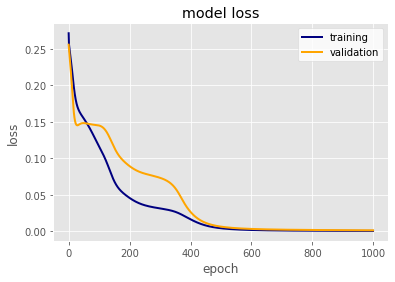

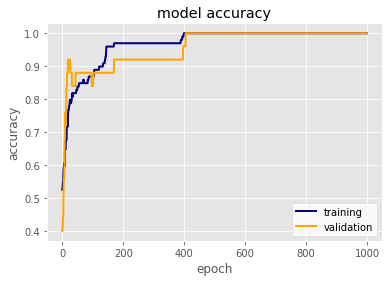

In [28]:
from wavegrad.utility import *
plot_loss(net)
plot_accuracy(net)

In [29]:
# Test accuracy on test set.
out = net.predict(Xtest)
accuracy(ytest, out)

0.9999999999999917

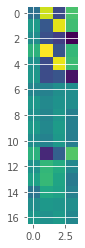

In [8]:
plt.imshow(net.layers[0].weights)

## Mnist-dataset

## Non provare ad eseguirlo sul mio pc che lo distruggi

In [10]:
# from keras.datasets import mnist
# from keras.utils import np_utils

# # load MNIST from server
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# # training data : 60000 samples
# # reshape and normalize input data
# x_train = x_train.reshape(x_train.shape[0], 28*28)
# x_train = x_train.astype('float32')
# x_train /= 255
# # encode output which is a number in range [0,9] into a vector of size 10
# # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
# y_train = np_utils.to_categorical(y_train)

# # same for test data : 10000 samples
# x_test = x_test.reshape(x_test.shape[0], 28*28)
# x_test = x_test.astype('float32')
# x_test /= 255
# y_test = np_utils.to_categorical(y_test)

In [12]:
# # Network
# net = Sequential()
# net.add(LayerDense(28*28, 100, tanh))                
# net.add(LayerDense(100, 50, tanh))                   
# net.add(LayerDense(50, 10, tanh))                    

# optim = SGD(net.layers, lr=0.01, momentum=0.6)
# # train on 1000 samples
# # as we didn't implemented mini-batch GD, training will be pretty slow if we update at each iteration on 60000 samples...
# net.use(MSE)
# net.fit(x_train, y_train, epochs=35, optimizer=optim, batch_size=32)

epoch 7/35   error=0.56    accuracy=0.00:  20%|██        | 7/35 [00:26<01:45,  3.75s/it]


KeyboardInterrupt: 

In [ ]:
# plot_loss(net)
# plot_accuracy(net)

In [3]:
# out = net.predict(x_test)

In [4]:
# net.accuracy(y_test, np.round(out))

0.6318999999999467

# Tensorflow model to compare with mine

In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
model = keras.Sequential([
    keras.Input(shape=(17,)),
    keras.layers.Dense(units=5, activation='sigmoid'),
    keras.layers.Dense(units=1, activation='tanh')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


The problem here is that Tensorflow don't have the Gradient Descent methos, but only the SGD so i have to implement it to compare the two networks

In [9]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), 
              loss=tf.losses.mean_squared_error,
              metrics=['accuracy'])

In [10]:
history = model.fit(
    Xtrain ,ytrain, epochs=500, batch_size=len(Xtrain)
)

Epoch 1/500
1/1 [==============================] - 0s 863us/step - loss: 0.4962 - accuracy: 0.4758
Epoch 2/500
1/1 [==============================] - 0s 843us/step - loss: 0.4807 - accuracy: 0.4758
Epoch 3/500
1/1 [==============================] - 0s 756us/step - loss: 0.4535 - accuracy: 0.4677
Epoch 4/500
1/1 [==============================] - 0s 608us/step - loss: 0.4195 - accuracy: 0.4516
Epoch 5/500
1/1 [==============================] - 0s 935us/step - loss: 0.3837 - accuracy: 0.4758
Epoch 6/500
1/1 [==============================] - 0s 779us/step - loss: 0.3506 - accuracy: 0.4758
Epoch 7/500
1/1 [==============================] - 0s 908us/step - loss: 0.3232 - accuracy: 0.4758
Epoch 8/500
1/1 [==============================] - 0s 865us/step - loss: 0.3027 - accuracy: 0.4839
Epoch 9/500
1/1 [==============================] - 0s 649us/step - loss: 0.2891 - accuracy: 0.4516
Epoch 10/500
1/1 [==============================] - 0s 685us/step - loss: 0.2815 - accuracy: 0.5000
Epoch 11/

In [11]:
out = model.predict(Xtrain)

In [12]:
out

array([[ 0.36476317],
       [ 0.37726066],
       [ 0.16110736],
       [ 0.29502416],
       [ 0.21770692],
       [ 0.22648835],
       [ 0.11529781],
       [-0.00424468],
       [ 0.6788523 ],
       [ 0.8291059 ],
       [ 0.38900843],
       [ 0.45696703],
       [ 0.33960238],
       [ 0.75531864],
       [ 0.2578091 ],
       [ 0.25546193],
       [ 0.12822352],
       [ 0.26036102],
       [ 0.22247815],
       [ 0.32227805],
       [ 0.20095304],
       [ 0.08568051],
       [ 0.07165043],
       [ 0.19664642],
       [ 0.29237512],
       [ 0.29106435],
       [ 0.34080538],
       [ 0.31580222],
       [ 0.11305197],
       [ 0.08399444],
       [ 0.7502239 ],
       [ 0.19846714],
       [ 0.29516426],
       [ 0.18360636],
       [ 0.18307969],
       [ 0.2753348 ],
       [ 0.68959904],
       [ 0.04742132],
       [ 0.14614426],
       [ 0.03103038],
       [ 0.02384963],
       [ 0.7574607 ],
       [ 0.15255205],
       [ 0.13135988],
       [ 0.12952748],
       [ 0

In [13]:
net.accuracy(ytest, out)

62.0

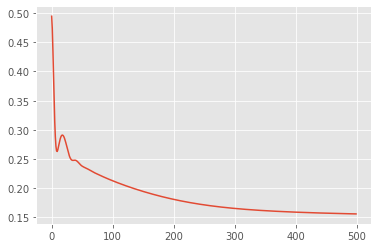

In [12]:
plt.plot(history.history['loss'])

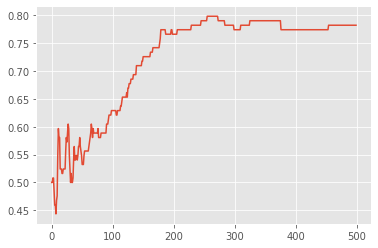

In [13]:
plt.plot(history.history['accuracy'])